<a href="https://colab.research.google.com/github/feitosafelipe/support-tickets/blob/main/feitosafelipe/clustering-modeling/Clustering_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Installing Libraries

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install umap-learn
!pip install scikit-learn-extra

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 6.0 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86831 sha256=74b213b08b88cc433a8ef5d4a374375cf62d003ed7f4b9ada34adc1b23280bea
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 19.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
from sklearn.cluster import KMeans
import numpy as np
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 30,12
from math import sqrt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import umap
import matplotlib.pylab as plt
import sklearn as sklearn
from sklearn_extra.cluster import KMedoids
import random
import scipy.cluster.hierarchy as sc
from sklearn.cluster import AgglomerativeClustering

# Reading data (S&P500 & Ibov)



##Reading data

In [ ]:
#Read dataset from IBOVESPA. Get the xlsx file here: https://github.com/ComputerFinance/ESWA/blob/main/df_Ibov_Final.xlsx
df_ibov = pd.read_excel('/content/df_Ibov_Final.xlsx')
df_ibov['Indice'] = 'Ibov'
#Rename column to create a single Beta column in the main dataframe
df_ibov = df_ibov.rename(columns={'B Ibovespa':'B'})

#Read dataset from S&P500. Get the xlsx file here: https://github.com/ComputerFinance/ESWA/blob/main/df_SP500_Final.xlsx
df_sp500 = pd.read_excel('/content/df_SP500_Final.xlsx')
df_sp500['Indice'] = 'S&P500'
#Rename column to create a single Beta column in the main dataframe
df_sp500 = df_sp500.rename(columns={'B S&P500':'B'})

df_indicators = pd.concat([df_sp500,df_ibov])
df_indicators_output_check = pd.concat([df_sp500,df_ibov])

In [ ]:
df_indicators_output_check

,Quarter,CR,QR,DTEQ,DTEB,NPM,ROA,ROE,PTE,PTB,...,IRR,BB,V,SR,VaR,MDD,Date Release,Ticker,Setor NAICS,Indice
0,1Q2016,1.131868,1.004227,373.767780,6.708405,-48.014440,0.659507,3.124530,107.152728,1.161598,...,0.175361,37.038285,13.047798,0.069696,2.693775,-0.344065,2016-01-31,A,Indústria manufatureira,S&P500
1,2Q2016,3.078553,2.588703,83.433373,10.651282,8.930324,1.191099,2.184874,157.260591,3.469520,...,8.999175,37.038285,12.044243,1.774803,2.486075,-7.667816,2016-04-30,A,Indústria manufatureira,S&P500
2,3Q2016,3.066898,2.595135,77.956742,9.160194,11.877395,1.603310,2.853198,123.520178,3.517218,...,17.866962,41.496561,11.043622,4.316620,2.264770,-9.468723,2016-07-31,A,Indústria manufatureira,S&P500
3,4Q2016,3.846561,3.282540,83.749411,8.000000,11.341134,1.614971,2.967499,120.042227,3.454828,...,-8.934837,44.123151,11.169089,-1.390956,2.277640,-2.172551,2016-10-31,A,Indústria manufatureira,S&P500
4,1Q2017,3.337925,2.831956,83.069767,7.632184,15.745080,2.134146,3.906977,101.271891,3.965569,...,12.927046,44.069549,10.826395,3.412840,2.243193,-8.122475,2017-01-31,A,Indústria manufatureira,S&P500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1771,4Q2020,2.116696,2.116696,189.090659,42.502990,-10.658087,-1.107804,-3.202558,-96.603066,3.094623,...,20.825615,28.921755,23.971215,2.776411,5.015909,-18.321429,2020-12-31,YDUQ3,Serviços financeiros e seguros,Ibov
1772,1Q2021,2.523391,2.523391,196.056052,16.626978,3.993706,0.448268,1.327125,186.170399,2.470714,...,-19.707540,31.346720,21.315711,-1.303499,4.389958,-5.123726,2021-03-31,YDUQ3,Educacão,Ibov
1773,2Q2021,1.555631,1.555631,195.568770,14.622233,10.034515,1.207992,3.570448,84.955051,3.039399,...,25.453832,30.376049,22.019056,3.655342,4.630309,-15.072373,2021-06-30,YDUQ3,Educacão,Ibov
1774,3Q2021,1.205517,1.205517,196.661418,14.308383,6.632704,0.733606,2.176326,98.488953,2.143441,...,-27.282408,29.299889,20.608209,-1.719183,4.264887,0.000000,2021-09-30,YDUQ3,Educacão,Ibov


##EDA

In [ ]:
df_indicators.isna().sum()

Quarter         0
CR              0
QR              0
DTEQ            0
DTEB            0
NPM             0
ROA             0
ROE             0
PTE             0
PTB             0
EV              0
EVTE            0
PFCF            0
R               0
B               0
IRR             0
BB              0
V               0
SR              0
VaR             0
MDD             0
Date Release    0
Ticker          0
Setor NAICS     0
Indice          0
dtype: int64

In [ ]:
#Create the adjusted ticker for brazilian stocks, with the ".SA" in the end of oeach stock ticker
df_indicators['Adj. Ticker']=df_indicators['Ticker']
df_indicators.loc[df_indicators['Indice']=='Ibov','Adj. Ticker'] = df_indicators.loc[df_indicators['Indice']=='Ibov','Adj. Ticker']+str('.SA')

In [ ]:
#Top 10 stocks with highest Sharpe Ratio
df_indicators.sort_values(by='SR',ascending=False)

,Quarter,CR,QR,DTEQ,DTEB,NPM,ROA,ROE,PTE,PTB,...,BB,V,SR,VaR,MDD,Date Release,Ticker,Setor NAICS,Indice,Adj. Ticker
881,2Q2020,0.969591,0.969591,-2143.867924,4408.500000,-63.422819,-2.907916,-72.721165,-13.235294,-3.116362,...,11.563151,59.391471,157.899168,12.679423,-20.795107,2020-06-30,APA,"Mineração, exploração de pedreiras e extração ...",S&P500,APA
1335,4Q2019,1.248375,0.828998,263.700149,17.963424,0.955696,0.273260,0.993845,221.365037,1.674545,...,5.294484,40.617418,131.332159,8.806178,-14.818182,2019-12-31,POSI3,Indústria manufatureira,Ibov,POSI3.SA
1697,2Q2020,1.171241,0.793256,474.113686,15.680451,1.231061,0.224238,1.287384,319.899453,4.840789,...,10.289778,47.397036,126.037491,10.079435,-14.585415,2020-06-30,VIIA3,Comércio varejista,Ibov,VIIA3.SA
2753,2Q2020,3.224224,3.187735,280.367522,-131.806724,-79.066972,-1.626362,-6.186152,-32.048000,1.928516,...,27.494833,69.298549,117.537770,14.893212,-19.277108,2020-06-30,CZR,Hotel e restaurante,S&P500,CZR
253,2Q2019,0.826152,1.627830,614.760245,8.758159,5.786735,0.389633,2.784939,86.624658,2.412444,...,4.105840,42.520387,87.108130,9.283152,-17.391304,2019-06-30,BPAN4,Serviços financeiros e seguros,Ibov,BPAN4.SA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9173,2Q2017,1.572633,1.251941,87.379856,17.381348,-1.085500,-0.108199,-0.202743,-1316.800000,2.306606,...,62.445585,8.187481,-2.971498,1.685957,-0.368863,2017-06-30,SLB,"Mineração, exploração de pedreiras e extração ...",S&P500,SLB
7590,3Q2017,1.455595,0.856227,165.371966,23.946995,6.372682,0.691690,1.835552,88.895833,1.642211,...,40.811370,9.612334,-2.989691,1.964095,-1.340782,2017-09-30,NWL,Indústria manufatureira,S&P500,NWL
52,1Q2017,1.450062,0.243984,178.755389,2.739156,5.522670,1.476736,4.532727,88.618520,2.847379,...,154.075475,7.803276,-2.996925,1.613231,0.000000,2017-04-22,AAP,Comércio varejista,S&P500,AAP
8383,4Q2017,0.570221,0.490679,285.456742,19.941721,4.049844,0.188047,0.724840,281.363636,1.980111,...,28.948368,8.142755,-3.409925,1.666693,-1.113468,2017-12-31,PPL,"Empresa de eletricidade, gás e água",S&P500,PPL


In [ ]:
#general information about the dataframe
df_indicators.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12936 entries, 0 to 1775
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Quarter       12936 non-null  object        
 1   CR            12936 non-null  float64       
 2   QR            12936 non-null  float64       
 3   DTEQ          12936 non-null  float64       
 4   DTEB          12936 non-null  float64       
 5   NPM           12936 non-null  float64       
 6   ROA           12936 non-null  float64       
 7   ROE           12936 non-null  float64       
 8   PTE           12936 non-null  float64       
 9   PTB           12936 non-null  float64       
 10  EV            12936 non-null  float64       
 11  EVTE          12936 non-null  float64       
 12  PFCF          12936 non-null  float64       
 13  R             12936 non-null  float64       
 14  B             12936 non-null  float64       
 15  IRR           12936 non-null  float64

Normalization:

Normalization of each *x* indicator is given by:

\begin{equation}
\ x_i' = \frac{x_i - min(x)}{max(x) - min(x)}\
\end{equation}

In [ ]:
#Normalization
columns = ['CR', 'QR',
       'DTEQ', 'DTEB',
       'NPM', 'ROA',
       'ROE', 'PTE',
       'PTB', 'EV',
       'EVTE',
       'PFCF',
       'R',
       'IRR',
       'BB',
       'V',
       'VaR',
       'MDD',
       'SR', 'B']

for column in columns:
  df_indicators[column] = (df_indicators[column]-min(df_indicators[column].dropna())) /(max(df_indicators[column].dropna())-min(df_indicators[column].dropna()))

# Analysis

-------------------------------------------------------------------------------
##Selection of assets with highest Obj. in each cluster each semester
------------------------------------------------------------------------------

---
Equation of selection of optimum cluster:

\begin{equation}
\ Obj \ = max(\frac{Current Ratio + Quick ratio + Net Profit Margin + Return on Assets + Return on Equity + Internal Rate of Return + Sharpe Ratio}{Debt−to−EBITDA + Enterprise Value−to−EBITDA + Debt−to−Equity + Price−to−Earning + Price−to−Book + Price−to−Free Cash Flow + Volatility + Value at Risk + Maximum Drawdown + Beta})\
\end{equation}

In [ ]:
def compare_quarter(quarter_0,n_assets):


  #Generating the objective function
  df_indicators['max'] = df_indicators['CR']+df_indicators['QR']+df_indicators['NPM']+df_indicators['ROA']+df_indicators['ROE']+df_indicators['IRR']+df_indicators['SR']
  df_indicators['min'] = df_indicators['DTEB']+df_indicators['PTE']+df_indicators['EVTE']+df_indicators['PFCF']+df_indicators['V']+df_indicators['VaR']+df_indicators['MDD']+df_indicators['DTEQ']+df_indicators['PTB']+df_indicators['B']
  df_indicators['Cluster_select'] = df_indicators['max']/df_indicators['min']
  df_indicators['Cluster_select'] = (df_indicators['Cluster_select']-min(df_indicators['Cluster_select'].dropna()))/(max(df_indicators['Cluster_select'].dropna())-min(df_indicators['Cluster_select'].dropna()))

  #UMAP application
  indicators_application = df_indicators.loc[df_indicators['Quarter'].astype(str) == quarter_0]
  indicators_application = indicators_application
  indicators_application = indicators_application.fillna(0)

  columns = ['CR', 'QR',
       'DTEQ', 'DTEB',
       'NPM', 'ROA',
       'ROE', 'PTE',
       'PTB', 'EV',
       'EVTE',
       'PFCF',
       'R',
       'IRR',
       'BB',
       'V',
       'VaR',
       'MDD',
       'SR', 'B']

  indicators_data = indicators_application[columns].values
  scaled_indicators_data = StandardScaler().fit_transform(indicators_data)

  reducer = umap.UMAP(random_state=30)
  embedding = reducer.fit_transform(indicators_data)

  #K-Means data preparation (to be used in the Silhouette and Davies-Bouldin tests)
  kmeans_input = pd.DataFrame(embedding)
  kmeans_input.rename(columns={0:'x',1:'y'},inplace=True)

  columns = ['x','y']

  #Normalization
  for column in columns:
    kmeans_input[column] = (kmeans_input[column]-min(kmeans_input[column].dropna()))/(max(kmeans_input[column].dropna())-min(kmeans_input[column].dropna()))

  X = kmeans_input.iloc[:,[0,1]].values

  cluster_num_tests = []
  for i in range(2,20):
    cluster_num_tests.append(i)

  #Silhouette and Davies-Bouldin tests
  silhouette_results = []
  davies_bouldin_results = []

  #Application of the Shilhouette and Davies-Bouldin indexes to select the number of clusters to be applied in the clustering models
  for cluster_num in (cluster_num_tests):

    kmeans = KMeans(n_clusters=cluster_num, random_state=0)
    kmeans_labels = kmeans.fit_predict(X)
    labels = kmeans_labels

    silhouette_results_i = [cluster_num,sklearn.metrics.silhouette_score(kmeans_input, labels, metric='euclidean')]
    silhouette_results.append(silhouette_results_i)

    davies_bouldin_i = [cluster_num, sklearn.metrics.davies_bouldin_score(kmeans_input, labels)]
    davies_bouldin_results.append(davies_bouldin_i)

  cluster_num_silhouette = pd.DataFrame(silhouette_results).rename(columns= {0:'cluster_num',1:'silhouette_score'}).sort_values(by='silhouette_score',ascending=False)['cluster_num'].iloc[0]
  cluster_num_davies_bouldin = pd.DataFrame(davies_bouldin_results).rename(columns= {0:'cluster_num',1:'davies_bouldin_score'}).sort_values(by='davies_bouldin_score',ascending=True)['cluster_num'].iloc[0]
  cluster_num = int((cluster_num_silhouette+cluster_num_davies_bouldin)/2)

  #K-Means Application
  kmeans = KMeans(n_clusters=cluster_num, random_state=0)
  kmeans_labels = kmeans.fit_predict(X)

  kmeans_output = pd.DataFrame(np.column_stack((kmeans_input, kmeans_labels)))
  kmeans_output = kmeans_output.rename(columns={0:'x',1:'y',2:'Cluster'})

  #Filling out the cluster column
  if 'Cluster UMAP K-Means' in (indicators_application.columns):
    indicators_application.drop('Cluster UMAP K-Means',axis='columns',inplace=True)

  for i in range(0,len(indicators_application)):
    cluster = int(kmeans_output['Cluster'].iloc[i])
  indicators_application.insert(0,'Cluster UMAP K-Means', kmeans_labels,allow_duplicates=True)


  #PAM Application
  X = kmeans_input.iloc[:,[0,1]].values
  kmedoids = KMedoids(n_clusters=cluster_num, random_state=0).fit(X)
  kmedoids.predict([X[random.randint(0, len(X))],
                  X[random.randint(0, len(X))],
                  X[random.randint(0, len(X))]])

  #Filling out the cluster column
  if 'Cluster PAM' in (indicators_application.columns):
    indicators_application.drop('Cluster PAM',axis='columns',inplace=True)


  for i in range(0,len(indicators_application)):
    cluster = int(kmedoids.labels_[i])
  indicators_application.insert(0,'Cluster PAM', kmedoids.labels_,allow_duplicates=True)

  #Hierarchical
  Y = kmeans_input
  cluster_hierarquical = AgglomerativeClustering(n_clusters=cluster_num, affinity='euclidean', linkage='ward')
  hierarquical = cluster_hierarquical.fit(Y)

  hierarquical_output = pd.DataFrame(np.column_stack((Y, hierarquical.labels_)))
  hierarquical_output = hierarquical_output.rename(columns={0:'x',1:'y',2:'Cluster'})

  #Filling out the cluster column
  if 'Cluster Hierarquical' in (indicators_application.columns):
    indicators_application.drop('Cluster Hierarquical',axis='columns',inplace=True)


  for i in range(0,len(indicators_application)):
    cluster = int(hierarquical_output['Cluster'].iloc[i])
  indicators_application.insert(0,'Cluster Hierarquical', hierarquical.labels_,allow_duplicates=True)

  df_indicators_dtref = indicators_application


  #Select n stocks with the highest Sharpe Ratio of each cluster
  assets_select = df_indicators_dtref.head(0)
  for model in ('Cluster UMAP K-Means','Cluster PAM',	'Cluster Hierarquical'):
    for i in range(0,cluster_num):
      assets_select_i = df_indicators_dtref.loc[df_indicators_dtref[model].astype(int)==int(i)].sort_values(by='Cluster_select',ascending=False)[:n_assets]
      assets_select_i['Modelo'] = str(model)
      if len(assets_select)==0:
        assets_select = assets_select_i.copy()
      else:
        assets_select = pd.concat([assets_select,assets_select_i])

  assets_select = assets_select[['Ticker','Setor NAICS','SR','Cluster_select']].drop_duplicates()
  assets_select = assets_select.reset_index()[['Ticker','Setor NAICS','SR','Cluster_select']]
  assets_select = assets_select.loc[:,~assets_select.columns.duplicated()]
  return assets_select,cluster_num,cluster_num_silhouette,cluster_num_davies_bouldin

In [ ]:
quarter_0 = '4Q2021'
n_assets = 2
#Generating the objective function
df_indicators['max'] = df_indicators['CR']+df_indicators['QR']+df_indicators['NPM']+df_indicators['ROA']+df_indicators['ROE']+df_indicators['IRR']+df_indicators['SR']
df_indicators['min'] = df_indicators['DTEB']+df_indicators['PTE']+df_indicators['EVTE']+df_indicators['PFCF']+df_indicators['V']+df_indicators['VaR']+df_indicators['MDD']+df_indicators['DTEQ']+df_indicators['PTB']+df_indicators['B']
df_indicators['Cluster_select'] = df_indicators['max']/df_indicators['min']
df_indicators['Cluster_select'] = (df_indicators['Cluster_select']-min(df_indicators['Cluster_select'].dropna()))/(max(df_indicators['Cluster_select'].dropna())-min(df_indicators['Cluster_select'].dropna()))

#UMAP application
indicators_application = df_indicators.loc[df_indicators['Quarter'].astype(str) == quarter_0]
indicators_application = indicators_application
indicators_application = indicators_application.fillna(0)

columns = ['CR', 'QR',
      'DTEQ', 'DTEB',
      'NPM', 'ROA',
      'ROE', 'PTE',
      'PTB', 'EV',
      'EVTE',
      'PFCF',
      'R',
      'IRR',
      'BB',
      'V',
      'VaR',
      'MDD',
      'SR', 'B']

indicators_data = indicators_application[columns].values
scaled_indicators_data = StandardScaler().fit_transform(indicators_data)

reducer = umap.UMAP(random_state=30)
embedding = reducer.fit_transform(indicators_data)

#K-Means data preparation (to be used in the Silhouette and Davies-Bouldin tests)
kmeans_input = pd.DataFrame(embedding)
kmeans_input.rename(columns={0:'x',1:'y'},inplace=True)

columns = ['x','y']

#Normalization
for column in columns:
  kmeans_input[column] = (kmeans_input[column]-min(kmeans_input[column].dropna()))/(max(kmeans_input[column].dropna())-min(kmeans_input[column].dropna()))

X = kmeans_input.iloc[:,[0,1]].values

cluster_num_tests = []
for i in range(2,20):
  cluster_num_tests.append(i)

#Silhouette and Davies-Bouldin tests
silhouette_results = []
davies_bouldin_results = []

#Application of the Shilhouette and Davies-Bouldin indexes to select the number of clusters to be applied in the clustering models
for cluster_num in (cluster_num_tests):

  kmeans = KMeans(n_clusters=cluster_num, random_state=0)
  kmeans_labels = kmeans.fit_predict(X)
  labels = kmeans_labels

  silhouette_results_i = [cluster_num,sklearn.metrics.silhouette_score(kmeans_input, labels, metric='euclidean')]
  silhouette_results.append(silhouette_results_i)

  davies_bouldin_i = [cluster_num, sklearn.metrics.davies_bouldin_score(kmeans_input, labels)]
  davies_bouldin_results.append(davies_bouldin_i)

cluster_num_silhouette = pd.DataFrame(silhouette_results).rename(columns= {0:'cluster_num',1:'silhouette_score'}).sort_values(by='silhouette_score',ascending=False)['cluster_num'].iloc[0]
cluster_num_davies_bouldin = pd.DataFrame(davies_bouldin_results).rename(columns= {0:'cluster_num',1:'davies_bouldin_score'}).sort_values(by='davies_bouldin_score',ascending=True)['cluster_num'].iloc[0]
cluster_num = int((cluster_num_silhouette+cluster_num_davies_bouldin)/2)

#K-Means Application
kmeans = KMeans(n_clusters=cluster_num, random_state=0)
kmeans_labels = kmeans.fit_predict(X)

kmeans_output = pd.DataFrame(np.column_stack((kmeans_input, kmeans_labels)))
kmeans_output = kmeans_output.rename(columns={0:'x',1:'y',2:'Cluster'})

##########################################################################3
kmeans_output.groupby('Cluster',dropna=False).count()
############################################################################

#Filling out the cluster column
if 'Cluster UMAP K-Means' in (indicators_application.columns):
  indicators_application.drop('Cluster UMAP K-Means',axis='columns',inplace=True)

for i in range(0,len(indicators_application)):
  cluster = int(kmeans_output['Cluster'].iloc[i])
indicators_application.insert(0,'Cluster UMAP K-Means', kmeans_labels,allow_duplicates=True)


#PAM Application
X = kmeans_input.iloc[:,[0,1]].values
kmedoids = KMedoids(n_clusters=cluster_num, random_state=0).fit(X)
kmedoids.predict([X[random.randint(0, len(X))],
                X[random.randint(0, len(X))],
                X[random.randint(0, len(X))]])

#Filling out the cluster column
if 'Cluster PAM' in (indicators_application.columns):
  indicators_application.drop('Cluster PAM',axis='columns',inplace=True)


for i in range(0,len(indicators_application)):
  cluster = int(kmedoids.labels_[i])
indicators_application.insert(0,'Cluster PAM', kmedoids.labels_,allow_duplicates=True)

#Hierarchical
Y = kmeans_input
cluster_hierarquical = AgglomerativeClustering(n_clusters=cluster_num, affinity='euclidean', linkage='ward')
hierarquical = cluster_hierarquical.fit(Y)

hierarquical_output = pd.DataFrame(np.column_stack((Y, hierarquical.labels_)))
hierarquical_output = hierarquical_output.rename(columns={0:'x',1:'y',2:'Cluster'})

#Filling out the cluster column
if 'Cluster Hierarquical' in (indicators_application.columns):
  indicators_application.drop('Cluster Hierarquical',axis='columns',inplace=True)


for i in range(0,len(indicators_application)):
  cluster = int(hierarquical_output['Cluster'].iloc[i])
indicators_application.insert(0,'Cluster Hierarquical', hierarquical.labels_,allow_duplicates=True)

df_indicators_dtref = indicators_application


#Select n stocks with the highest Sharpe Ratio of each cluster
assets_select = df_indicators_dtref.head(0)
for model in ('Cluster UMAP K-Means','Cluster PAM',	'Cluster Hierarquical'):
  for i in range(0,cluster_num):
    assets_select_i = df_indicators_dtref.loc[df_indicators_dtref[model].astype(int)==int(i)].sort_values(by='Cluster_select',ascending=False)[:n_assets]
    assets_select_i['Modelo'] = str(model)
    if len(assets_select)==0:
      assets_select = assets_select_i.copy()
    else:
      assets_select = pd.concat([assets_select,assets_select_i])

assets_select = assets_select[['Ticker','Setor NAICS','SR','Cluster_select']].drop_duplicates()
assets_select = assets_select.reset_index()[['Ticker','Setor NAICS','SR','Cluster_select']]
assets_select = assets_select.loc[:,~assets_select.columns.duplicated()]

In [ ]:
kmeans_output.groupby('Cluster',dropna=False).count()

,x,y
Cluster,,
0.0,26,26
1.0,38,38
2.0,67,67
3.0,55,55
4.0,42,42
5.0,53,53
6.0,42,42
7.0,68,68
8.0,35,35


In [ ]:
rcParams['figure.figsize'] = 15,10

In [ ]:
cluster_num_tests = (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20)
davies_bouldin_results = []
silhouette_results = []
for cluster_num in (cluster_num_tests):
  kmeans = KMeans(n_clusters=cluster_num, random_state=0)
  previsoes = kmeans.fit_predict(indicators_data)
  labels = previsoes
  silhouette_results_i = [cluster_num,sklearn.metrics.silhouette_score(indicators_data, labels, metric='euclidean')]
  silhouette_results.append(silhouette_results_i)

  davies_bouldin_i = [cluster_num, sklearn.metrics.davies_bouldin_score(indicators_data, labels)]
  davies_bouldin_results.append(davies_bouldin_i)

cluster_num_silhouette = pd.DataFrame(silhouette_results).rename(columns= {0:'cluster_num',1:'silhouette_score'}).sort_values(by='silhouette_score',ascending=False)['cluster_num'].iloc[0]
cluster_num_davies_bouldin = pd.DataFrame(davies_bouldin_results).rename(columns= {0:'cluster_num',1:'davies_bouldin_score'}).sort_values(by='davies_bouldin_score',ascending=True)['cluster_num'].iloc[0]
cluster_num_kmeans_exUMAP = int((cluster_num_silhouette+cluster_num_davies_bouldin)/2)

kmeans = KMeans(n_clusters=cluster_num_kmeans_exUMAP, random_state=0)
previsoes = kmeans.fit_predict(indicators_data)
kmeans_output = pd.DataFrame(np.column_stack((kmeans_input, previsoes)))
kmeans_output = kmeans_output.rename(columns={0:'x',1:'y',2:'Cluster'})

indicators_application['Cluster k-means'] = ''
for i in range(0,len(indicators_application)):
  cluster = int(kmeans_output['Cluster'].iloc[i])
  indicators_application['Cluster k-means'].iloc[i] = int(cluster)

kmeans_output.groupby('Cluster',dropna=False).count()

,x,y
Cluster,,
0.0,533,533
1.0,6,6


In [ ]:
cluster_num_kmeans_exUMAP

2

In [ ]:
cluster_num

20

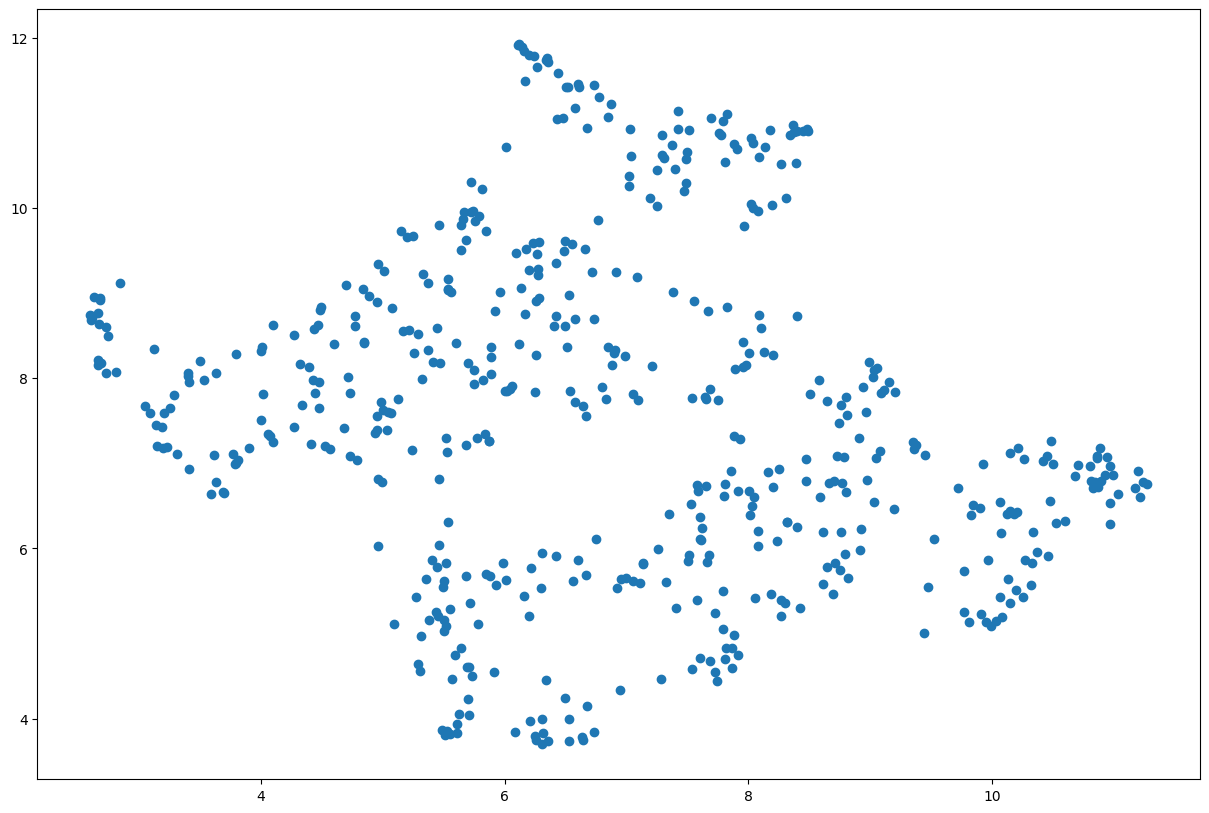

In [ ]:
plt.scatter(embedding[:,0], embedding[:,1])

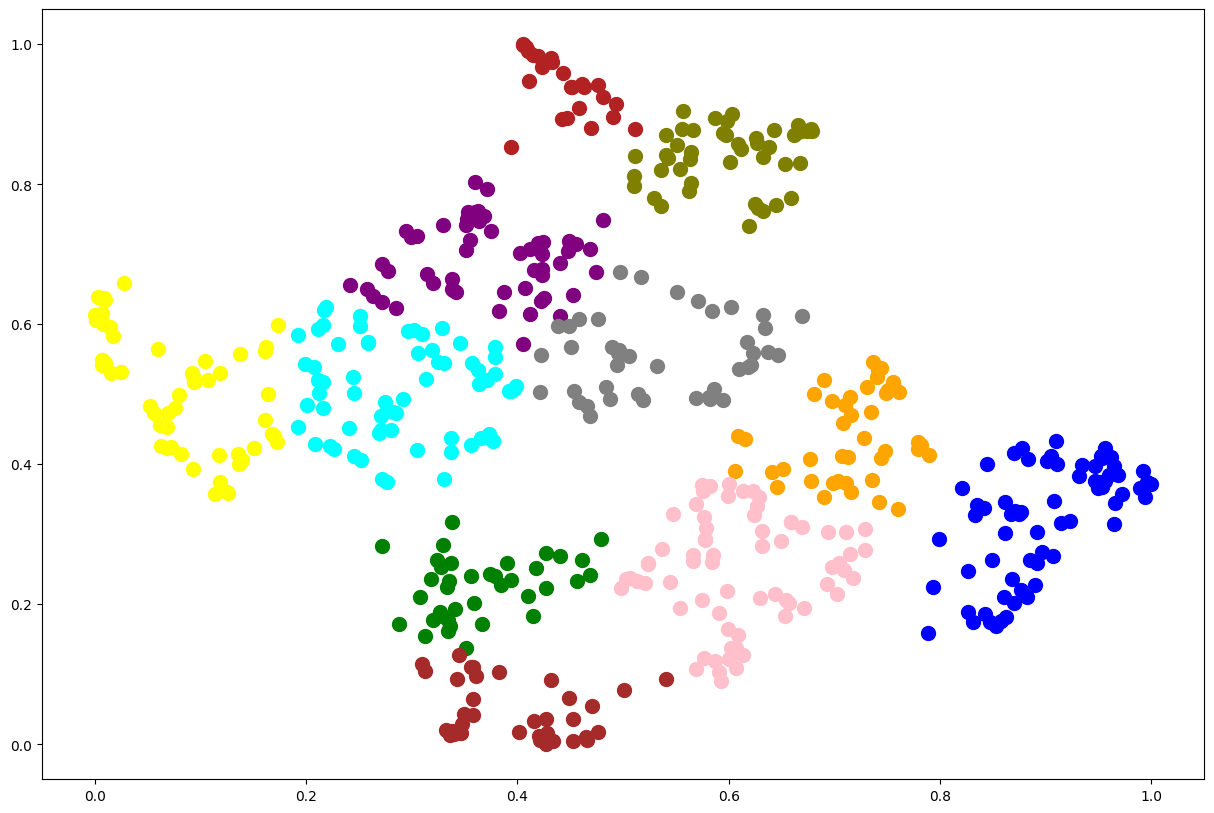

In [ ]:
plt.scatter(X[kmeans_labels == 0,0], X[kmeans_labels == 0,1],s=100, c='firebrick', label = 'Cluster 0')
plt.scatter(X[kmeans_labels == 1,0], X[kmeans_labels == 1,1],s=100, c='green', label = 'Cluster 1')
plt.scatter(X[kmeans_labels == 2,0], X[kmeans_labels == 2,1],s=100, c='blue', label = 'Cluster 2')
plt.scatter(X[kmeans_labels == 3,0], X[kmeans_labels == 3,1],s=100, c='yellow', label = 'Cluster 3')
plt.scatter(X[kmeans_labels == 4,0], X[kmeans_labels == 4,1],s=100, c='orange', label = 'Cluster 4')
plt.scatter(X[kmeans_labels == 5,0], X[kmeans_labels == 5,1],s=100, c='purple', label = 'Cluster 5')
plt.scatter(X[kmeans_labels == 6,0], X[kmeans_labels == 6,1],s=100, c='grey', label = 'Cluster 6')
plt.scatter(X[kmeans_labels == 7,0], X[kmeans_labels == 7,1],s=100, c='pink', label = 'Cluster 7')
plt.scatter(X[kmeans_labels == 8,0], X[kmeans_labels == 8,1],s=100, c='brown', label = 'Cluster 8')
plt.scatter(X[kmeans_labels == 9,0], X[kmeans_labels == 9,1],s=100, c='olive', label = 'Cluster 9')
plt.scatter(X[kmeans_labels == 10,0], X[kmeans_labels == 10,1],s=100, c='cyan', label = 'Cluster 10')
plt.scatter(X[kmeans_labels == 11,0], X[kmeans_labels == 11,1],s=100, c='salmon', label = 'Cluster 11')
plt.scatter(X[kmeans_labels == 12,0], X[kmeans_labels == 12,1],s=100, c='cadetblue', label = 'Cluster 12')
plt.scatter(X[kmeans_labels == 13,0], X[kmeans_labels == 13,1],s=100, c='violet', label = 'Cluster 13')

Text(0.5, 1.0, 'KMedoids clustering. Medoids are represented in cyan.')

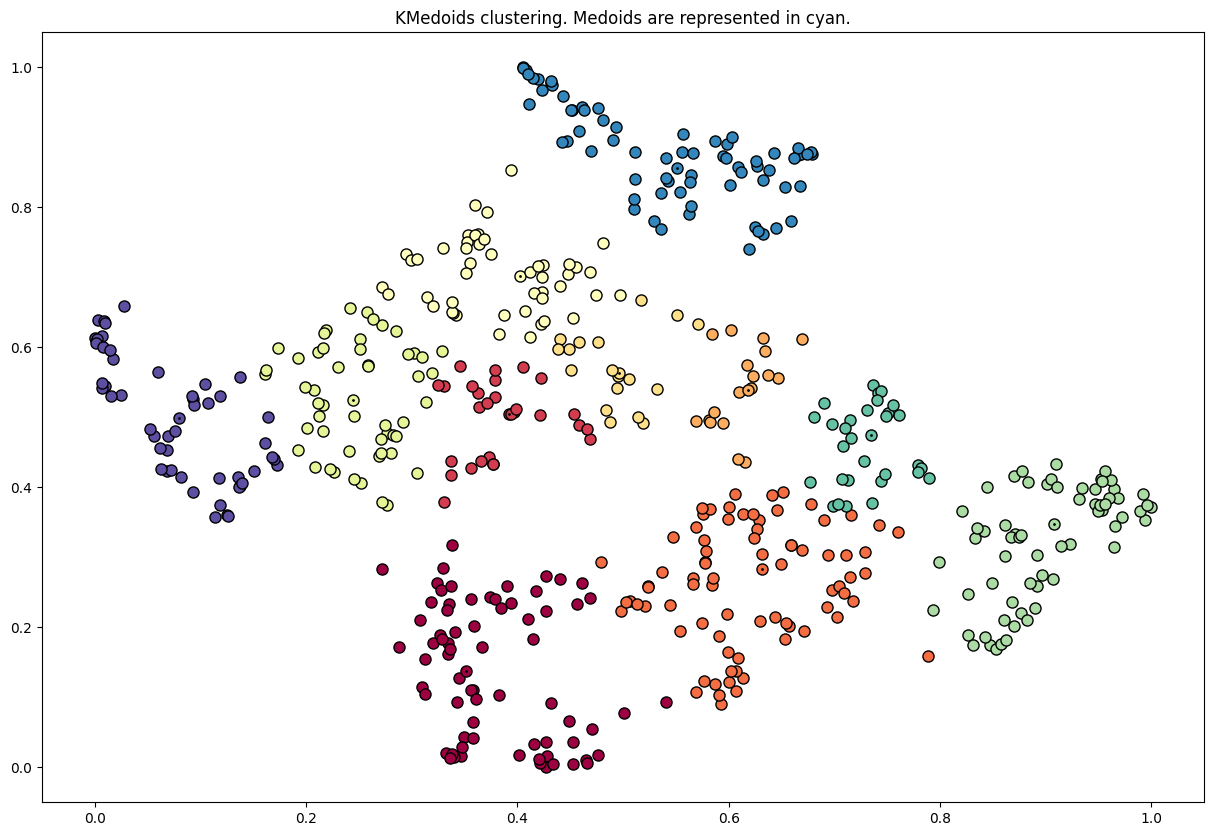

In [ ]:
labels = kmedoids.labels_

unique_labels = set(labels)
colors = [
    plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))
]
for k, col in zip(unique_labels, colors):

    class_member_mask = labels == k

    xy = X[class_member_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=8,
    )

plt.plot(
    kmedoids.cluster_centers_[:, 0],
    kmedoids.cluster_centers_[:, 1],
    "o",
    markerfacecolor="cyan",
    markeredgecolor="k",
    markersize=1,
)

plt.title("KMedoids clustering. Medoids are represented in cyan.")

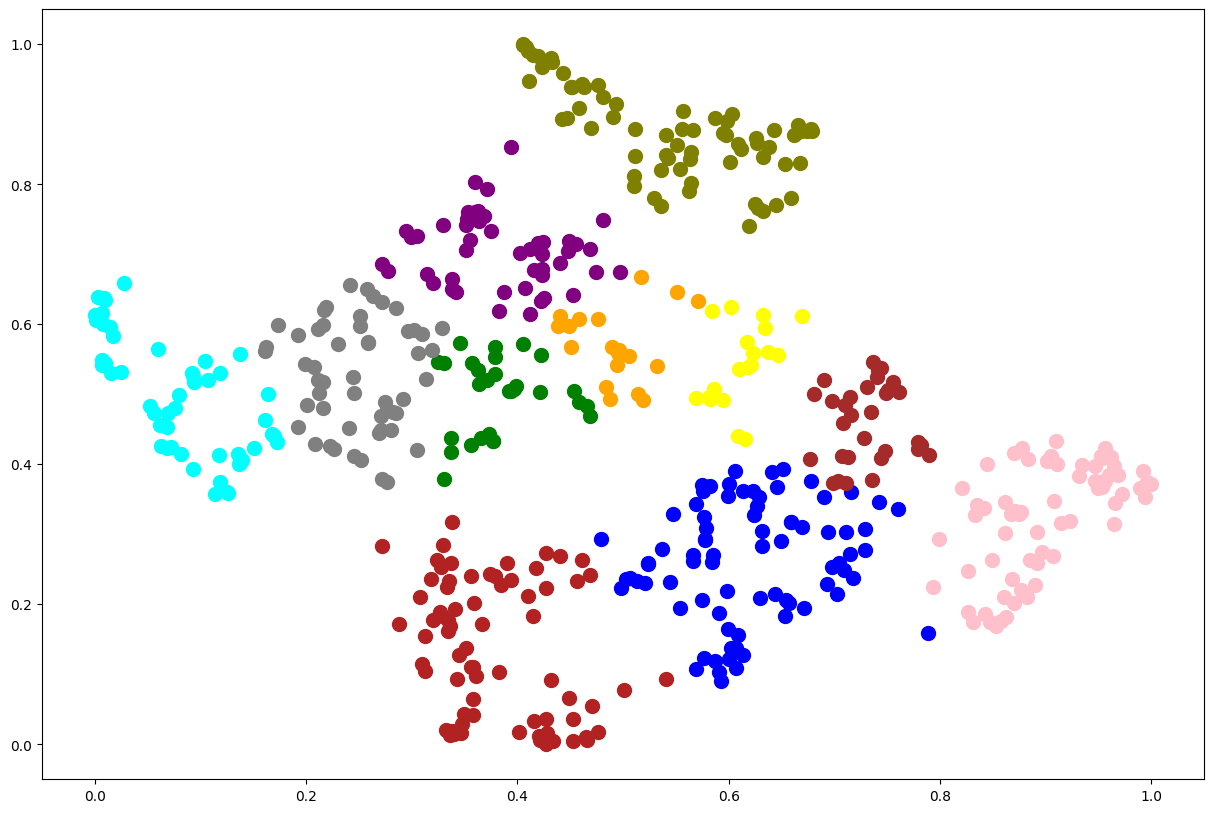

In [ ]:
plt.scatter(X[kmedoids.labels_ == 0,0], X[kmedoids.labels_ == 0,1],s=100, c='firebrick', label = 'Cluster 0')
plt.scatter(X[kmedoids.labels_ == 1,0], X[kmedoids.labels_ == 1,1],s=100, c='green', label = 'Cluster 1')
plt.scatter(X[kmedoids.labels_ == 2,0], X[kmedoids.labels_ == 2,1],s=100, c='blue', label = 'Cluster 2')
plt.scatter(X[kmedoids.labels_ == 3,0], X[kmedoids.labels_ == 3,1],s=100, c='yellow', label = 'Cluster 3')
plt.scatter(X[kmedoids.labels_ == 4,0], X[kmedoids.labels_ == 4,1],s=100, c='orange', label = 'Cluster 4')
plt.scatter(X[kmedoids.labels_ == 5,0], X[kmedoids.labels_ == 5,1],s=100, c='purple', label = 'Cluster 5')
plt.scatter(X[kmedoids.labels_ == 6,0], X[kmedoids.labels_ == 6,1],s=100, c='grey', label = 'Cluster 6')
plt.scatter(X[kmedoids.labels_ == 7,0], X[kmedoids.labels_ == 7,1],s=100, c='pink', label = 'Cluster 7')
plt.scatter(X[kmedoids.labels_ == 8,0], X[kmedoids.labels_ == 8,1],s=100, c='brown', label = 'Cluster 8')
plt.scatter(X[kmedoids.labels_ == 9,0], X[kmedoids.labels_ == 9,1],s=100, c='olive', label = 'Cluster 9')
plt.scatter(X[kmedoids.labels_ == 10,0], X[kmedoids.labels_ == 10,1],s=100, c='cyan', label = 'Cluster 10')
plt.scatter(X[kmedoids.labels_ == 11,0], X[kmedoids.labels_ == 11,1],s=100, c='salmon', label = 'Cluster 11')
plt.scatter(X[kmedoids.labels_ == 12,0], X[kmedoids.labels_ == 12,1],s=100, c='cadetblue', label = 'Cluster 12')
plt.scatter(X[kmedoids.labels_ == 13,0], X[kmedoids.labels_ == 13,1],s=100, c='violet', label = 'Cluster 13')

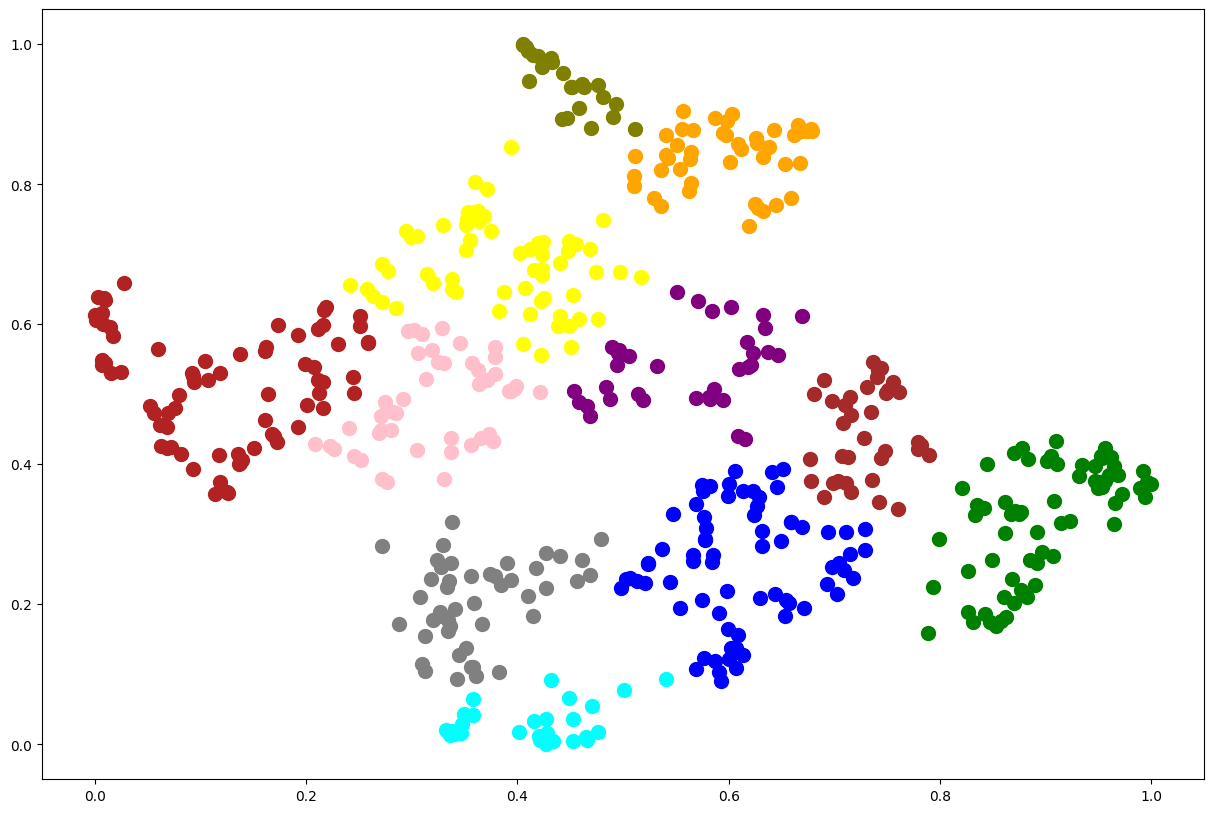

In [ ]:
indicators = kmeans_input.values

#plt.figure(figsize=(10, 7))
plt.scatter(indicators[hierarquical.labels_ == 0, 0], indicators[hierarquical.labels_ == 0, 1], s = 100, c = 'firebrick', label = 'Cluster 1')
plt.scatter(indicators[hierarquical.labels_ == 1, 0], indicators[hierarquical.labels_ == 1, 1], s = 100, c = 'green', label = 'Cluster 2')
plt.scatter(indicators[hierarquical.labels_ == 2, 0], indicators[hierarquical.labels_ == 2, 1], s = 100, c = 'blue', label = 'Cluster 3')
plt.scatter(indicators[hierarquical.labels_ == 3, 0], indicators[hierarquical.labels_ == 3, 1], s = 100, c = 'yellow', label = 'Cluster 4')
plt.scatter(indicators[hierarquical.labels_ == 4, 0], indicators[hierarquical.labels_ == 4, 1], s = 100, c = 'orange', label = 'Cluster 5')
plt.scatter(indicators[hierarquical.labels_ == 5, 0], indicators[hierarquical.labels_ == 5, 1], s = 100, c = 'purple', label = 'Cluster 6')
plt.scatter(indicators[hierarquical.labels_ == 6, 0], indicators[hierarquical.labels_ == 6, 1], s = 100, c = 'grey', label = 'Cluster 7')
plt.scatter(indicators[hierarquical.labels_ == 7, 0], indicators[hierarquical.labels_ == 7, 1], s = 100, c = 'pink', label = 'Cluster 8')
plt.scatter(indicators[hierarquical.labels_ == 8, 0], indicators[hierarquical.labels_ == 8, 1], s = 100, c = 'brown', label = 'Cluster 9')
plt.scatter(indicators[hierarquical.labels_ == 9, 0], indicators[hierarquical.labels_ == 9, 1], s = 100, c = 'olive', label = 'Cluster 10')
plt.scatter(indicators[hierarquical.labels_ == 10, 0], indicators[hierarquical.labels_ == 10, 1], s = 100, c = 'cyan', label = 'Cluster 11')
plt.scatter(indicators[hierarquical.labels_ == 11, 0], indicators[hierarquical.labels_ == 11, 1], s = 100, c = 'salmon', label = 'Cluster 12')
plt.scatter(indicators[hierarquical.labels_ == 12, 0], indicators[hierarquical.labels_ == 12, 1], s = 100, c = 'cadetblue', label = 'Cluster 13')
plt.scatter(indicators[hierarquical.labels_ == 13, 0], indicators[hierarquical.labels_ == 13, 1], s = 100, c = 'violet', label = 'Cluster 14')
#plt.legend()
plt.show()

## Basket for 2 assets with highest Obj.

In [ ]:
quarters = ['1Q2016','2Q2016','3Q2016','4Q2016','1Q2017','2Q2017','3Q2017','4Q2017','1Q2018','2Q2018','3Q2018','4Q2018','1Q2019','2Q2019','3Q2019','4Q2019','1Q2020','2Q2020','3Q2020','4Q2020','1Q2021','2Q2021','4Q2021']

#Final Dataframe
df_final = pd.DataFrame()


#Create an empty dataframe
final_basket = pd.DataFrame(columns=['Ticker','Setor NAICS','SR','Cluster_select','Quarter'])

cluster_num_time = []

#loop to run through each quarter
for quarter in quarters:


    #Get the stock basket for the current iteration quarter
    basket = compare_quarter(quarter,2)

    cluster_num_time_i = [quarter,basket[1],basket[2],basket[3]]
    cluster_num_time.append(cluster_num_time_i)

    basket = basket[0]

    #Create a temporary basket
    basket_temp = pd.DataFrame(columns=['Ticker','Setor NAICS','SR','Cluster_select'])

    #Filter current iteration quarter
    df_indicators_dtref = df_indicators.loc[df_indicators['Quarter'].astype(str) == quarter]

    final_basket =  basket[['Ticker','SR']].merge(df_indicators_dtref[['Ticker','SR','Setor NAICS','Cluster_select']], how='inner', on = 'Ticker').rename(columns={'Sharpe Ratio_y':'SR','Setor NAICS_x':'Setor NAICS'})

    #Analyse the objective function result in the final basket dataframe
    obj_final_basket = final_basket['Cluster_select'].mean()
    if np.isnan(obj_final_basket) :
        obj_final_basket = 0

    #Get each sotck of final basket
    for i in range(len(basket)):

        #Get the Ticker from basket
        ticker = basket['Ticker'].loc[i]

        #Verify if the ticker is in the final basket
        if ticker in final_basket:

            #If yes, add the ticker in the temporary basket
            basket_temp = basket_temp.append(basket.iloc[i,:])

        else:
            #If not, compare the Obj's

            #Get the Ticker Obj. from the quarterly basket
            obj = basket['Cluster_select'].loc[i]

            #If the Ticker Obj is higher than the average Obj of final basket
            if obj >= obj_final_basket:

                #Add in the temporary basket
                basket_temp = basket_temp.append(basket.iloc[i,:])

    #Replace the final basket by temporary basket
    basket_temp['Quarter'] = quarter


    final_basket['Quarter'] = quarter
    if len(basket_temp)>0:
      final_basket = basket_temp


    df_final = df_final.append(final_basket)

    #Determine the average Obj of the final basket
    obj_final_basket = final_basket['Cluster_select'].mean()
    if np.isnan(obj_final_basket) :
        obj_final_basket = 0

####Output

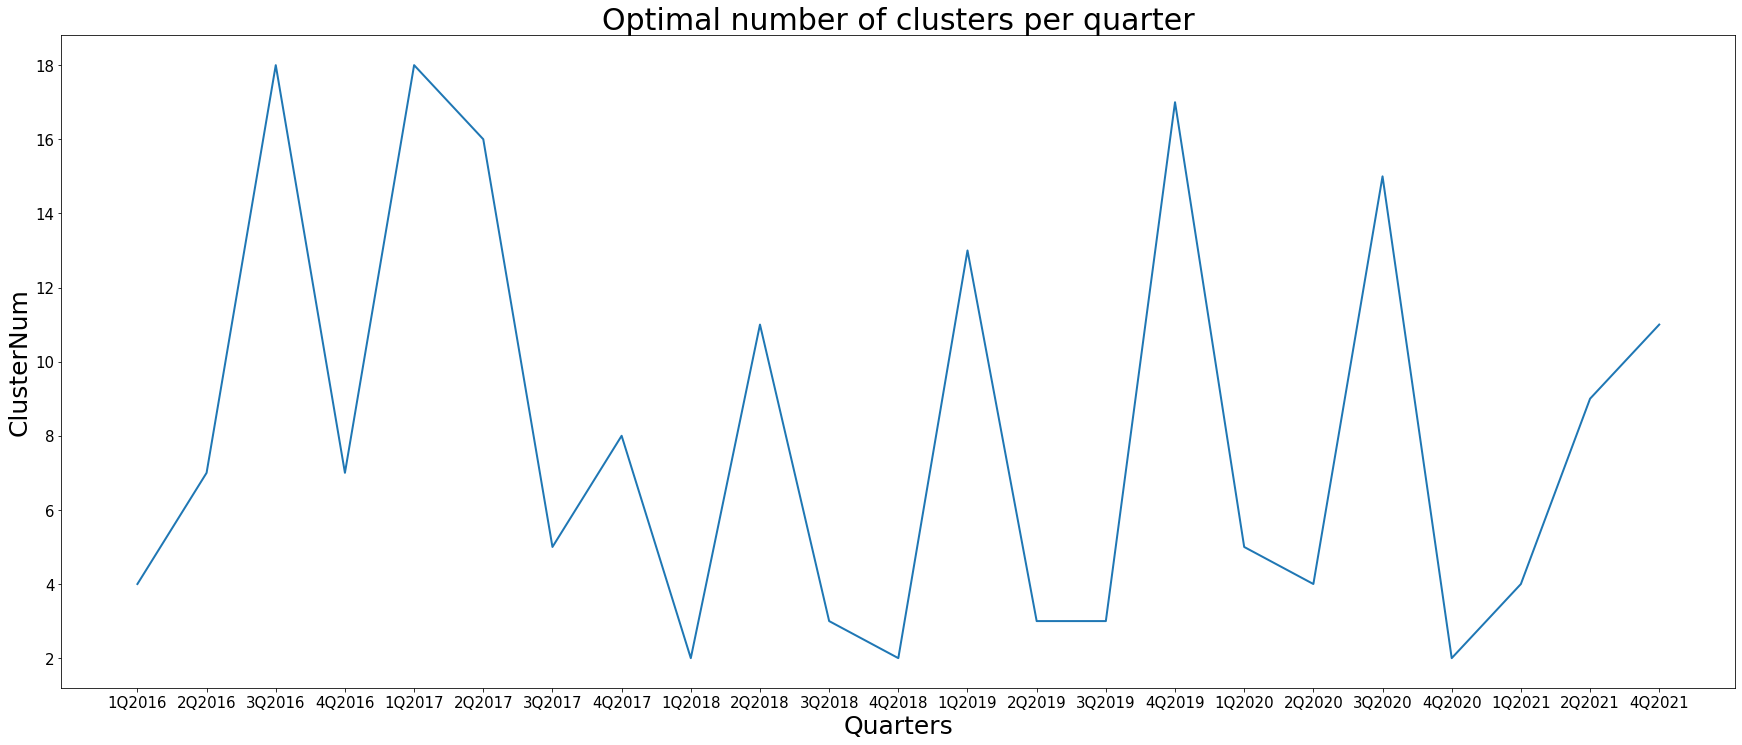

In [ ]:
cluster_num_historico = pd.DataFrame(cluster_num_time).rename({0:'Quarter',1:'ClusterNum',2:'Silhouette',3:'Davies-Bouldin'},axis='columns')
rcParams['figure.figsize'] = 30,12
plt.plot(cluster_num_historico['Quarter'],cluster_num_historico['ClusterNum'],linewidth=2.0)
plt.xlabel("Quarters",fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("ClusterNum",fontsize=25)
plt.title("Optimal number of clusters per quarter",fontsize=30)
plt.show()

In [ ]:
cluster_num_historico

,Quarter,ClusterNum,Silhouette,Davies-Bouldin
0,1Q2016,4,3,5
1,2Q2016,7,3,12
2,3Q2016,18,19,17
3,4Q2016,7,2,12
4,1Q2017,18,19,18
5,2Q2017,16,18,14
6,3Q2017,5,3,8
7,4Q2017,8,8,9
8,1Q2018,2,2,2
9,2Q2018,11,3,19


In [ ]:
df_final[df_final['Quarter']=='4Q2021']

,Ticker,Setor NAICS,SR,Cluster_select,Quarter
2,ANET,Indústria manufatureira,0.118209,0.477385,4Q2021
3,NVDA,Indústria manufatureira,0.058054,0.475360,4Q2021
4,VRTX,Indústria manufatureira,0.053044,0.481307,4Q2021
5,PFE,Indústria manufatureira,0.064543,0.474044,4Q2021
8,NLOK,Informação,0.027899,0.609187,4Q2021
9,LOW,Comércio varejista,0.049827,0.474195,4Q2021
12,NVR,Construção,0.058559,0.459002,4Q2021
13,MTD,Indústria manufatureira,0.069143,0.439901,4Q2021
14,VRSN,"Serviços profissionais, científicos e técnicos",0.063679,0.477551,4Q2021
15,INCY,"Serviços profissionais, científicos e técnicos",0.031000,0.456208,4Q2021


In [ ]:
len(df_final[df_final['Quarter']=='4Q2021'])

12

In [ ]:
len(df_indicators_output_check.loc[(df_indicators_output_check['Quarter'] == '4Q2021') & (df_indicators_output_check['Ticker'].isin(df_final[df_final['Quarter']=='4Q2021']['Ticker']))][['Ticker','Indice','SR']])

12

In [ ]:
df_indicators_output_check.loc[(df_indicators_output_check['Quarter'] == '4Q2021') & (df_indicators_output_check['Ticker'].isin(df_final[df_final['Quarter']=='4Q2021']['Ticker']))][['Ticker','Indice','SR']]

,Ticker,Indice,SR
791,ANET,S&P500,15.213409
5231,INCY,S&P500,1.101845
6191,LOW,S&P500,4.148193
6791,MNST,S&P500,1.675031
7103,MTD,S&P500,7.273886
7319,NLOK,S&P500,0.599945
7559,NVDA,S&P500,5.479485
7583,NVR,S&P500,5.561192
8063,PFE,S&P500,6.529458
10487,VRSN,S&P500,6.389754


In [ ]:
df_indicators_output_check.loc[(df_indicators_output_check['Quarter'] == '4Q2021') & (df_indicators_output_check['Ticker'].isin(df_final[df_final['Quarter']=='4Q2021']['Ticker']))][['Ticker','Indice','SR']]['SR'].mean()

5.068192229036667

In [ ]:
df_indicators_output_check.loc[(df_indicators_output_check['Quarter'] == '4Q2021')][['Ticker','Indice','SR']]['SR'].mean()

1.7318932306080776

In [ ]:
#Generating the objective function
df_indicators_output_check['max'] = df_indicators_output_check['CR']+df_indicators_output_check['QR']+df_indicators_output_check['NPM']+df_indicators_output_check['ROA']+df_indicators_output_check['ROE']+df_indicators_output_check['IRR']+df_indicators_output_check['SR']
df_indicators_output_check['min'] = df_indicators_output_check['DTEB']+df_indicators_output_check['PTE']+df_indicators_output_check['EVTE']+df_indicators_output_check['PFCF']+df_indicators_output_check['V']+df_indicators_output_check['VaR']+df_indicators_output_check['MDD']+df_indicators_output_check['DTEQ']+df_indicators_output_check['PTB']+df_indicators_output_check['B']
df_indicators_output_check['Cluster_select'] = df_indicators_output_check['max']/df_indicators_output_check['min']

In [ ]:
df_indicators_output_check.loc[(df_indicators_output_check['Quarter'] == '4Q2021') & (df_indicators_output_check['Ticker'].isin(df_final[df_final['Quarter']=='4Q2021']['Ticker']))][['Ticker','Indice','SR','Cluster_select']]['Cluster_select'].mean()

0.22239586386388996

In [ ]:
df_indicators_output_check.loc[(df_indicators_output_check['Quarter'] == '4Q2021')][['Ticker','Indice','SR','Cluster_select']]['Cluster_select'].mean()

0.06865537415894563